# Model to estimate the price of used cars - Part 2

In this notebook a model


### Dependencies needed for this model

* pandas
* numpy
* matplotlib
* seaborn
* scipy

Firstly the libraries are imported and the data saved to a DataFrame from the values on the csv file

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats

pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('clean-data.csv')

___

## Describing the data

Looking for correlations between the different items and the objective value (price).

Some usual steps for starting are:

* Numerical data:
    * Visualizing the correlation between the different attributes and the objetive value.
    * Looking at scatters plots and correlations between specific attributes and the objective value
    * Making ANOVA analysis to find correlations and 

 

* Categorical data:

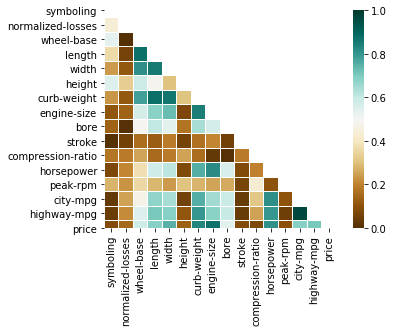

In [3]:

# Using the absolute value since I only care about how much they correlate, and not how positive or negative that correlation is, makes easier for me
corr = abs(df.corr())

# Making a mask to hide half of the graph, since it repeats itself
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

# Graphing
sns.heatmap(corr,
            mask=mask,
            vmax=1,
            vmin=0,
            square=True,
            cmap="BrBG",
            linewidth=0.1)

In [4]:
# The chosen criteria for choosing the attributes for future analysis will be the ones that have a correlation factor above 0.6
attributes=set()

# Debe haber una mejor forma
for  index, corr_factor in enumerate(df.corr()['price']):
    if corr_factor >= 0.6:
        attributes.add(df.corr()['price'].index[index])
attributes.discard('price')
print(attributes)

{'curb-weight', 'engine-size', 'width', 'horsepower', 'length'}


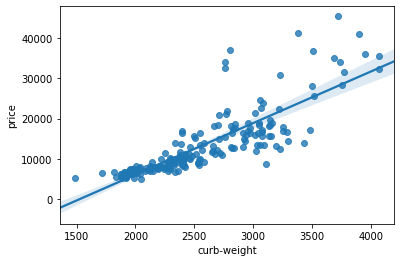

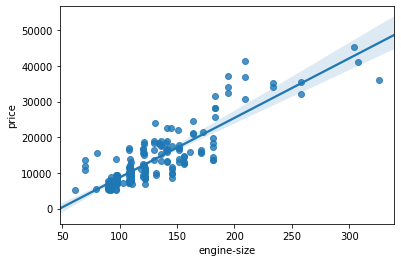

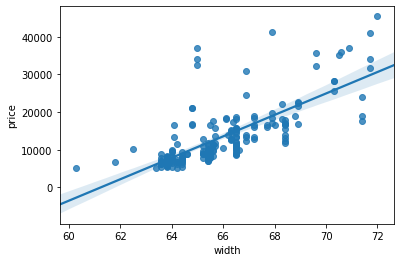

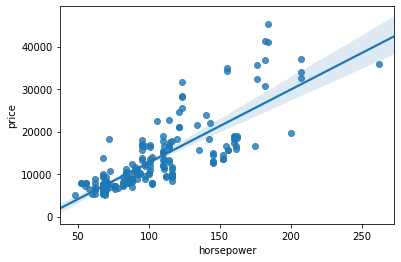

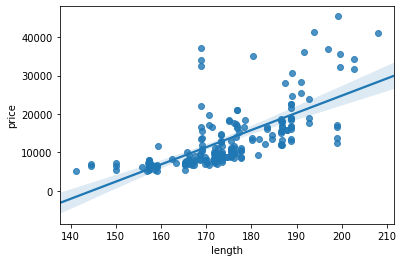

In [5]:
# Graphing a scatter plot of each of the selected attributes
for att in attributes:
    sns.regplot(df[att], df['price'])
    plt.show()

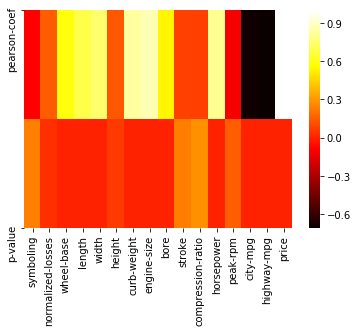

In [74]:
## ANOVA analysis of the selected data

anova_values = dict()

for column in df:
    try:
        pearson_coef, p_value = stats.pearsonr(df[column],df['price'])
        anova_values[column] = {
            'pearson-coef': pearson_coef,
            'p-value': p_value
        }
    except:
        #print(f'\n{column} ain\'t numerical data\n')
        None

sns.heatmap(pd.DataFrame(anova_values),cmap='hot')

### Analyzing categorical data

In [7]:
categorical_attributes = set()

for att in df.columns:
    if df[att].dtypes == 'object':
        categorical_attributes.add(att)

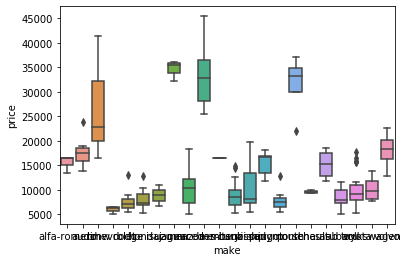

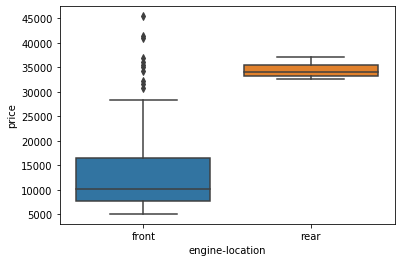

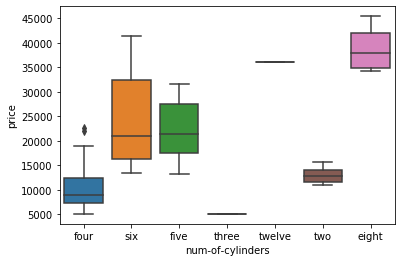

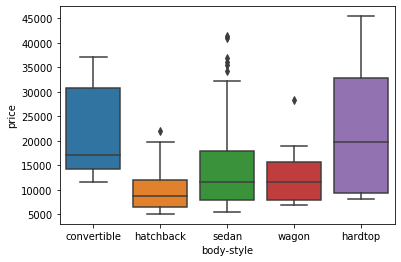

In [14]:
for att in categorical_attributes:
    sns.boxplot(x=att, y='price', data=df)
    plt.show()

In [9]:
categorical_attributes = {'body-style','engine-location', 'make','num-of-cylinders'}

In [10]:
df.describe(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,199,199,199,199,199,199,199,199,199,199
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,180,164,113,92,116,196,143,155,91


### Some important methods to work with categorical data

In [17]:
df.describe(include='object')
df[att].value_counts()
df[att].value_counts().to_frame()
df[att].unique()
df['num-of-cylinders'].value_counts()

,make,engine-location,num-of-cylinders,body-style
count,199,199,199,199
unique,22,2,7,5
top,toyota,front,four,sedan
freq,32,196,155,92


In [12]:
### Grouping categorical data

In [39]:
cat = list(categorical_attributes)
cat+=['price']
grouped_df = df[cat]
grouped_df

,make,engine-location,num-of-cylinders,body-style,price
0,alfa-romero,front,four,convertible,13495.0
1,alfa-romero,front,four,convertible,16500.0
2,alfa-romero,front,six,hatchback,16500.0
3,audi,front,four,sedan,13950.0
4,audi,front,five,sedan,17450.0
...,...,...,...,...,...
194,volvo,front,four,sedan,16845.0
195,volvo,front,four,sedan,19045.0
196,volvo,front,six,sedan,21485.0
197,volvo,front,six,sedan,22470.0


In [53]:
grouped_df.groupby(['num-of-cylinders','body-style'], as_index=False).mean().pivot(index='num-of-cylinders',columns='body-style')

price                                       \
body-style       convertible  hardtop     hatchback         sedan   
num-of-cylinders                                                    
eight               35056.00  45400.0           NaN  37572.000000   
five                     NaN  28176.0           NaN  20676.000000   
four                14814.75   9384.0   9044.245614  10926.811594   
six                 37028.00  33278.0  17392.166667  25387.538462   
three                    NaN      NaN   5151.000000           NaN   
twelve                   NaN      NaN           NaN  36000.000000   
two                      NaN      NaN  13020.000000           NaN   

                                
body-style               wagon  
num-of-cylinders                
eight                      NaN  
five              23584.000000  
four              11046.761905  
six               15074.500000  
three                      NaN  
twelve                     NaN  
two                        NaN

In [55]:
## ANOVA

TypeError: unsupported operand type(s) for +: 'float' and 'str'